In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# Specify the path to the Common Voice dataset
dataset_path = 'F:/cv-corpus-7.0-2021-07-21/en'

In [3]:
# Read the CSV file containing the metadata of the Common Voice dataset
metadata_path = f'{dataset_path}/train.tsv'
metadata_df = pd.read_csv(metadata_path, sep='\t')

In [4]:
metadata_df.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,5abb126fd1e28573785f326f586caca772323d32a57b42...,common_voice_en_86742.mp3,Don't hurt my sore arm again.,2,0,NaN,NaN,NaN,en,NaN
1,5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...,common_voice_en_22932163.mp3,It also resembles a Japanese curry and usually...,2,0,twenties,female,us,en,NaN
2,5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...,common_voice_en_22932165.mp3,"She was referred to affectionately as ""The Rho...",2,1,twenties,female,us,en,NaN
3,5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...,common_voice_en_22932166.mp3,"A period referred to as the 'Ai Noa or ""free e...",2,0,twenties,female,us,en,NaN
4,5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...,common_voice_en_22932167.mp3,"The river flows generally north, and its headw...",2,1,twenties,female,us,en,NaN


In [5]:
metadata_df.groupby("age")["age"].unique()

age
eighties      [eighties]
fifties        [fifties]
fourties      [fourties]
nineties      [nineties]
seventies    [seventies]
sixties        [sixties]
teens            [teens]
thirties      [thirties]
twenties      [twenties]
Name: age, dtype: object

In [6]:
metadata_df.groupby("gender")["gender"].unique()

gender
female    [female]
male        [male]
other      [other]
Name: gender, dtype: object

In [7]:
#Data Preprocessing
#Let's see the number of samples of each gender:
# get total samples
n_samples = len(metadata_df)
# get total male samples
n_male_samples = len(metadata_df[metadata_df['gender'] == 'male'])
# get total female samples
n_female_samples = len(metadata_df[metadata_df['gender'] == 'female'])
print("Total samples:", n_samples)
print("Total male samples:", n_male_samples)
print("Total female samples:", n_female_samples)

Total samples: 759975
Total male samples: 384284
Total female samples: 145409


else
metadata_df["class"] and =1
age_mapping = {
    'eighties': 80,
    'fifties': 50,
    'fourties': 40,
    'nineties': 90,
    'seventies': 70,
    'sixties': 60,
    'teens': 10,
    'thirties': 30,
    'twenties': 20
}

In [8]:
metadata_df.loc[(metadata_df["age"] == 'teens') | 
                (metadata_df["age"] == 'thirties') | 
                (metadata_df["age"] == 'twenties'), "class"] = 0

metadata_df.loc[(metadata_df["age"] == 'eighties') & 
                (metadata_df["gender"] == 'female') | 
                (metadata_df["age"] == 'fifties')& 
                (metadata_df["gender"] == 'female') |
                (metadata_df["age"] == 'fourties') & 
                (metadata_df["gender"] == 'female') |
                (metadata_df["age"] == 'nineties') & 
                (metadata_df["gender"] == 'female') |
                (metadata_df["age"] == 'seventies')& 
                (metadata_df["gender"] == 'female') |
                (metadata_df["age"] == 'sixties') & 
                (metadata_df["gender"] == 'female'), "class"] = 1

metadata_df.loc[(metadata_df["age"] == 'eighties')  & (metadata_df["gender"] == 'male') |
                (metadata_df["age"] == 'fifties')  & (metadata_df["gender"] == 'male') |
                (metadata_df["age"] == 'fourties')  & (metadata_df["gender"] == 'male') |
                (metadata_df["age"] == 'nineties')  & (metadata_df["gender"] == 'male') |
                (metadata_df["age"] == 'seventies')  & (metadata_df["gender"] == 'male') |
                (metadata_df["age"] == 'sixties')  & (metadata_df["gender"] == 'male'), "class"] = 2

In [9]:
metadata_df.dropna(subset=["class"], inplace=True)

In [10]:
metadata_df["class"] = metadata_df["class"].astype(int)

In [11]:
metadata_df.head(55)

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment,class
1,5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...,common_voice_en_22932163.mp3,It also resembles a Japanese curry and usually...,2,0,twenties,female,us,en,NaN,0
2,5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...,common_voice_en_22932165.mp3,"She was referred to affectionately as ""The Rho...",2,1,twenties,female,us,en,NaN,0
3,5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...,common_voice_en_22932166.mp3,"A period referred to as the 'Ai Noa or ""free e...",2,0,twenties,female,us,en,NaN,0
4,5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...,common_voice_en_22932167.mp3,"The river flows generally north, and its headw...",2,1,twenties,female,us,en,NaN,0
13,5ac7da06dcd9df9b384bc9ffcc1724246c2ca144b9843b...,common_voice_en_21011978.mp3,Think about it carefully.,2,0,twenties,male,NaN,en,NaN,0
14,5ac7da06dcd9df9b384bc9ffcc1724246c2ca144b9843b...,common_voice_en_21012180.mp3,A local disco is holding a contest to find the...,2,0,twenties,male,NaN,en,NaN,0
15,5ac7da06dcd9df9b384bc9ffcc1724246c2ca144b9843b...,common_voice_en_21012182.mp3,It is derived from neural crest cells.,2,0,twenties,male,NaN,en,NaN,0
16,5ac7da06dcd9df9b384bc9ffcc1724246c2ca144b9843b...,common_voice_en_21012185.mp3,At Famous he worked mostly on the Casper the F...,2,1,twenties,male,NaN,en,NaN,0
17,5ac9facf28c38b8d6d0bd1adae4a4426dd5bf83bbd2492...,common_voice_en_19745474.mp3,Air University is affiliated with Pakistan Eng...,2,0,twenties,male,england,en,NaN,0
18,5ac9facf28c38b8d6d0bd1adae4a4426dd5bf83bbd2492...,common_voice_en_19745476.mp3,"Critically, ""This Time Around"" received mainly...",2,1,twenties,male,england,en,NaN,0


In [12]:
metadata_df.groupby("class")["class"].unique()

class
0    [0]
1    [1]
2    [2]
Name: class, dtype: object

In [13]:
metadata_df.groupby("age")["age"].unique()

age
eighties      [eighties]
fifties        [fifties]
fourties      [fourties]
nineties      [nineties]
seventies    [seventies]
sixties        [sixties]
teens            [teens]
thirties      [thirties]
twenties      [twenties]
Name: age, dtype: object

In [14]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")

In [15]:
 metadata_df.count()

client_id     546194
path          546194
sentence      546194
up_votes      546194
down_votes    546194
age           546194
gender        544045
accent        382974
locale        546194
segment            0
class         546194
dtype: int64

In [16]:
plt.rcParams["figure.figsize"] = (4, 5)
plt.rcParams["figure.dpi"] = 200

Text(0.5, 1.0, 'Gender')

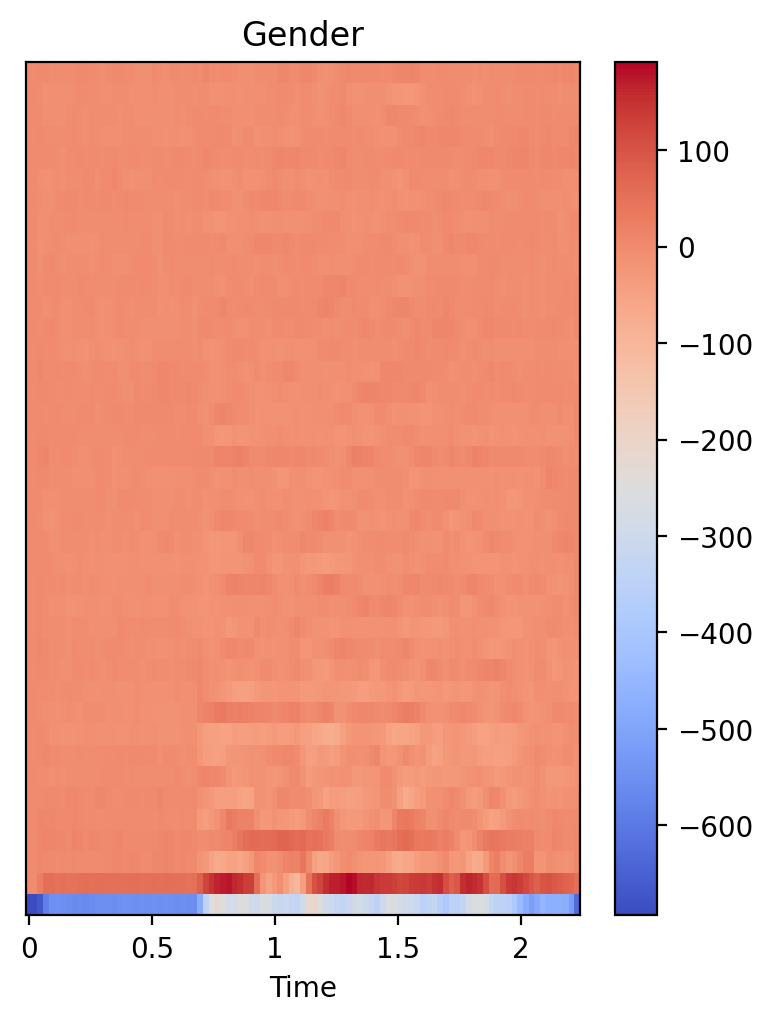

In [17]:

audio_path =  "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_1.mp3"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("Gender")

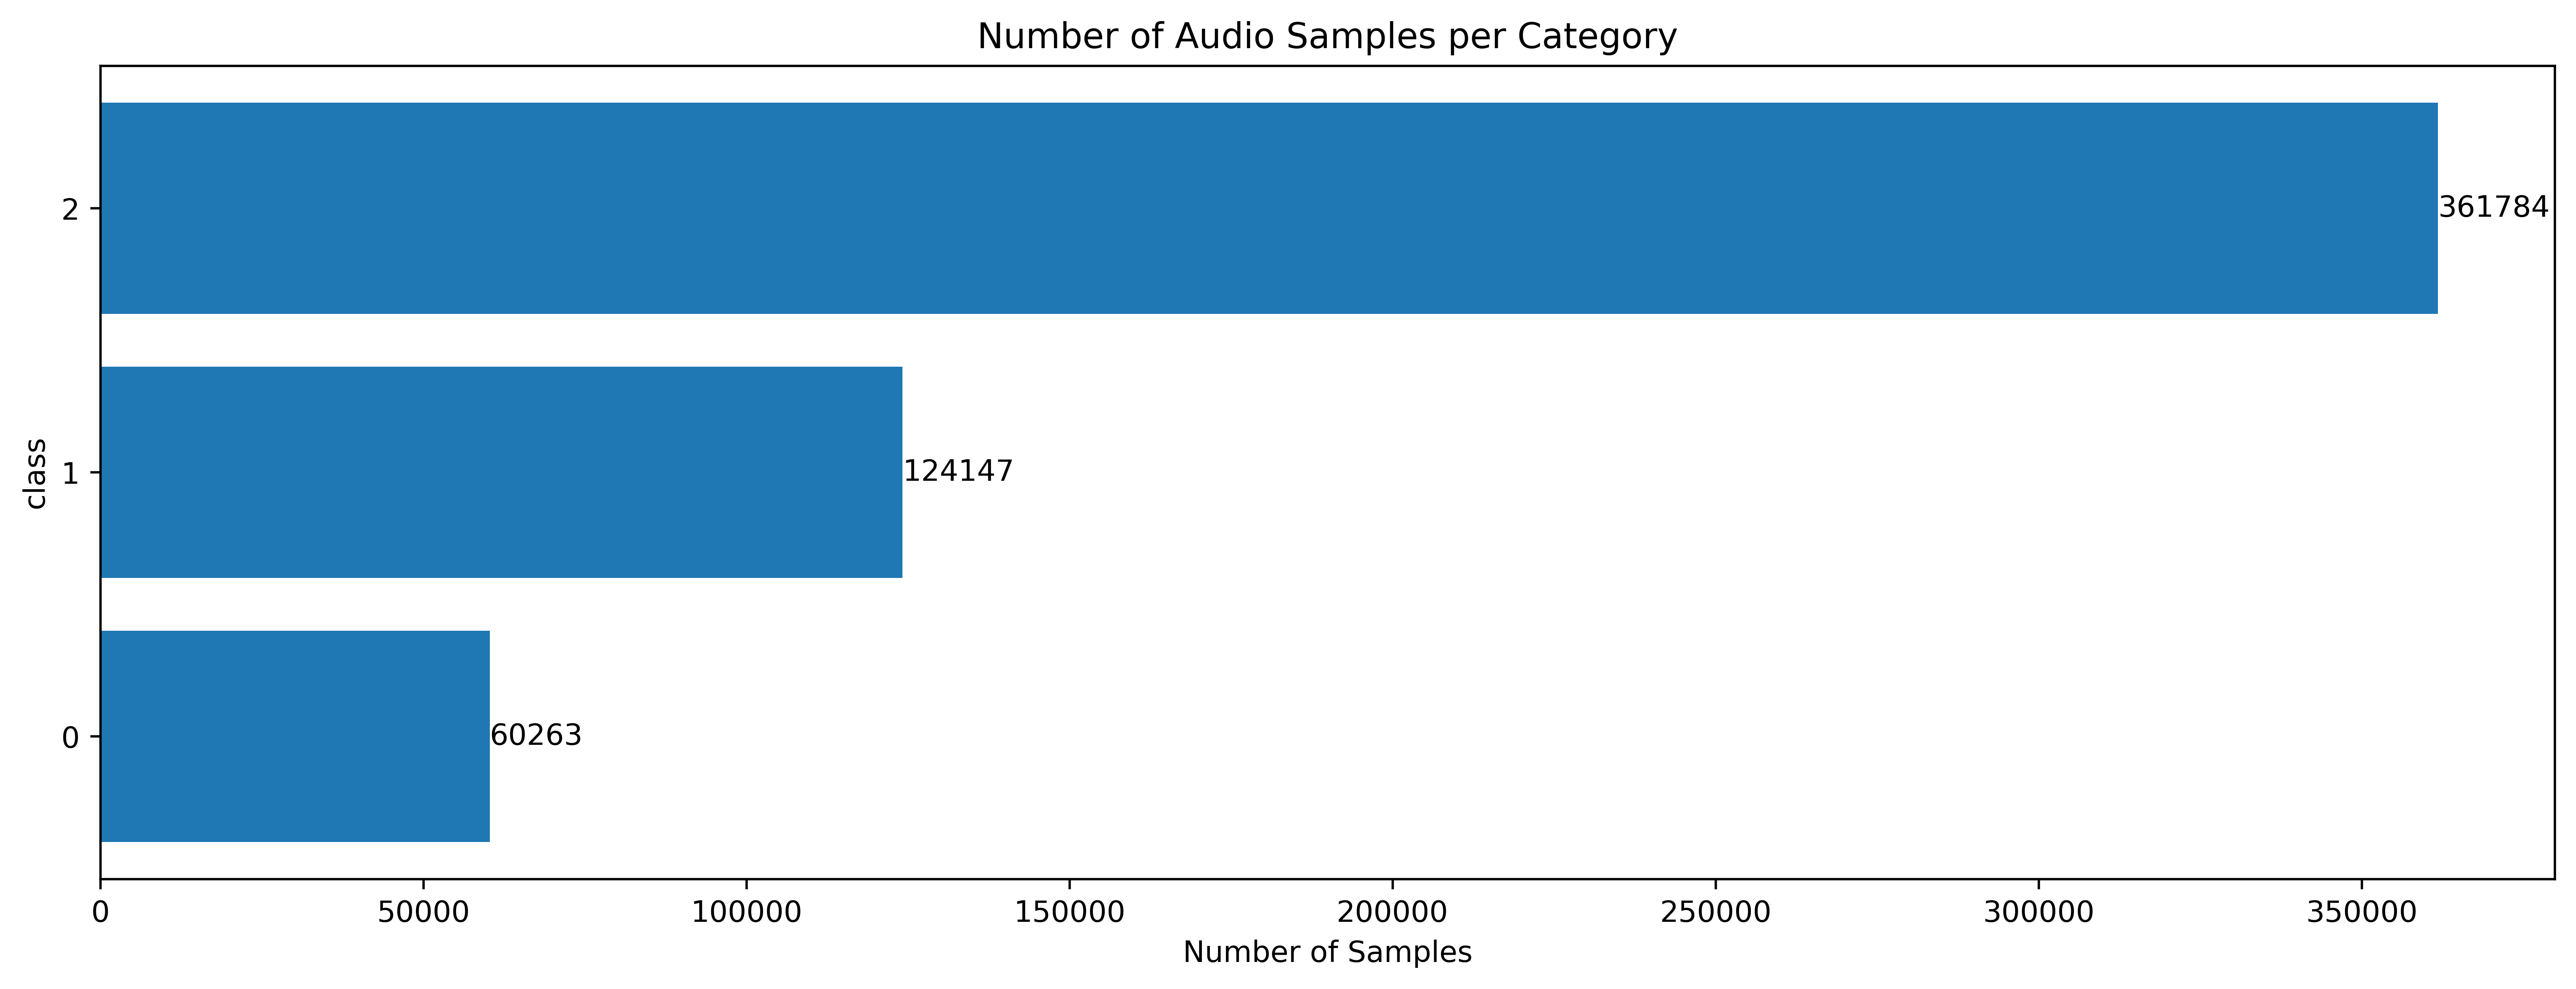

In [18]:
x = metadata_df["class"].unique()
y = metadata_df["class"].value_counts(ascending=True)
ind = np.arange(len(y))
# plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)
ax.bar_label(ax.containers[0])
plt.gcf().set_dpi(500)
plt.title("Number of Audio Samples per Category")
plt.xlabel("Number of Samples")
plt.ylabel("class")
plt.show()

else
metadata_df["class"] and =1
age_mapping = {
    'eighties': 80,
    'fifties': 50,
    'fourties': 40,
    'nineties': 90,
    'seventies': 70,
    'sixties': 60,
    'teens': 10,
    'thirties': 30,
    'twenties': 20
}

In [19]:
import IPython.display as ipd
import librosa
import lazy_loader as lazy
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")

In [20]:
#!pip install resampy

In [21]:
#!pip install --upgrade librosa

In [22]:
#!pip install resampy

In [23]:
#!pip3 install resampy

In [24]:
#!pip install pandas

In [25]:
import resampy

In [26]:
#!pip install --upgrade librosa

In [27]:
import os
import librosa
import numpy as np
from tqdm import tqdm

# List to store the extracted features and labels
extracted = []

# Iterate over each row in the DataFrame within the specified range
#for index_num, row in tqdm(metadata_df.iloc[:1045].iterrows()):
#for index_num, row in tqdm(metadata_df.iloc[:120002].iterrows()):
    # Get the file path
    audio_dataset_path = "F:/cv-corpus-7.0-2021-07-21/en/clips"
    file_path = os.path.join(audio_dataset_path, str(row["path"]))
    
    # Get the file label
    final_class_label = row["class"]
    
    # Load the audio file
    audio, sample_rate = librosa.load(file_path, res_type="kaiser_fast")
    
    # Extract the features (MFCC)
    features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)
    
    # Feature scaling
    scaled_features = np.mean(features.T, axis=0)
    
    # Store the features and label in the list
    extracted.append([scaled_features, final_class_label])

120002it [3:31:31,  9.46it/s]


desired_duration=10
def feature_extractor(filename):
    data,sr = librosa.load(filename, duration = desired_duration, res_type='kaise_best')
    if len(data) < sr * desired_duration:
        data = np.pad(data, (0, sr * desired_duration - len(data)))
         
    
    mfcc_features = librosa.feature.mfcc(y=data,sr=samp_rate, n_mfcc=40)
    mfcc_scaled_features = np.mean(mfcc_features.T, axis=0)
    return mfcc_scaled_features

#Runtime - 2min 14 sec 775 iterations for 3 clips per bird
from tqdm import tqdm #Allows to see progress
extracted_features=[]
for index_num,row in tqdm(metadata_df.iterrows()):
    filename= "D:/cv-corpus-7.0-2021-07-21-en.tar_2/cv-corpus-7.0-2021-07-21/en/clips/"
    final_class_labels=row["class"]
    data=feature_extractor(filename)
    extracted_features.append([data,final_class_labels])

In [29]:
# create a new dataframe
extracted = []
extracted_df = pd.DataFrame(extracted, columns=["feature", "class"])
# Storing the dataframe to pickle for further processing
extracted_df.to_pickle("extracted_df1.pkl")
extracted_df.head(55)

,feature,class


In [30]:
extracted_df.to_pickle("extracted_df1.pkl")

## Data Preprocessing
### Distribute the data to X and Y

In [27]:
final = pd.read_pickle("C:/Users/KT/Speech2/extracted_df.pkl")
X = np.array(final["feature"].tolist())
y = np.array(final["class"].tolist())
# label encoding to get encoding
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))

ValueError: zero-size array to reduction operation maximum which has no identity

### Split the data into train and test sets

In [30]:
# split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])

NameError: name 'Y' is not defined

### Model 1 - ANN
#### Building the model

In [30]:

num_labels = Y.shape[1]
ANN_Model = Sequential()
ANN_Model.add(Dense(1000, activation="relu", input_shape=(128,)))
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(Dense(500, activation="relu"))
ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(Dense(num_labels, activation="softmax"))
ANN_Model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              129000    
                                                                 
 dense_1 (Dense)             (None, 750)               750750    
                                                                 
 dense_2 (Dense)             (None, 500)               375500    
                                                                 
 dense_3 (Dense)             (None, 250)               125250    
                                                                 
 dense_4 (Dense)             (None, 100)               25100     
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 3)                 

### Compiling the Model

In [31]:
ANN_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

## Fitting the model

In [32]:
num_epochs = 250
num_batch_size = 32

t0 = time.time()

ANN_Results = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

ANN_Model.save("ANN_Model.h5")
print("ANN Model Saved")
train_hist_m1 = pd.DataFrame(ANN_Results.history)
train_m1 = round(time.time() - t0, 3)

Epoch 1/250


3001/3001 [==============================] - 23s 7ms/step - loss: 0.5738 - accuracy: 0.7795 - val_loss: 0.5388 - val_accuracy: 0.7899
Epoch 2/250
3001/3001 [==============================] - 21s 7ms/step - loss: 0.5066 - accuracy: 0.7968 - val_loss: 0.4984 - val_accuracy: 0.7984
Epoch 3/250
3001/3001 [==============================] - 22s 7ms/step - loss: 0.4561 - accuracy: 0.8172 - val_loss: 0.4348 - val_accuracy: 0.8240
Epoch 4/250
3001/3001 [==============================] - 22s 7ms/step - loss: 0.4085 - accuracy: 0.8367 - val_loss: 0.4096 - val_accuracy: 0.8402
Epoch 5/250
3001/3001 [==============================] - 22s 7ms/step - loss: 0.3692 - accuracy: 0.8533 - val_loss: 0.3870 - val_accuracy: 0.8450
Epoch 6/250
3001/3001 [==============================] - 22s 7ms/step - loss: 0.3338 - accuracy: 0.8685 - val_loss: 0.3627 - val_accuracy: 0.8600
Epoch 7/250
3001/3001 [==============================] - 22s 7ms/step - loss: 0.3009 - accuracy: 0.8825 - val_loss: 0.3693

## Results

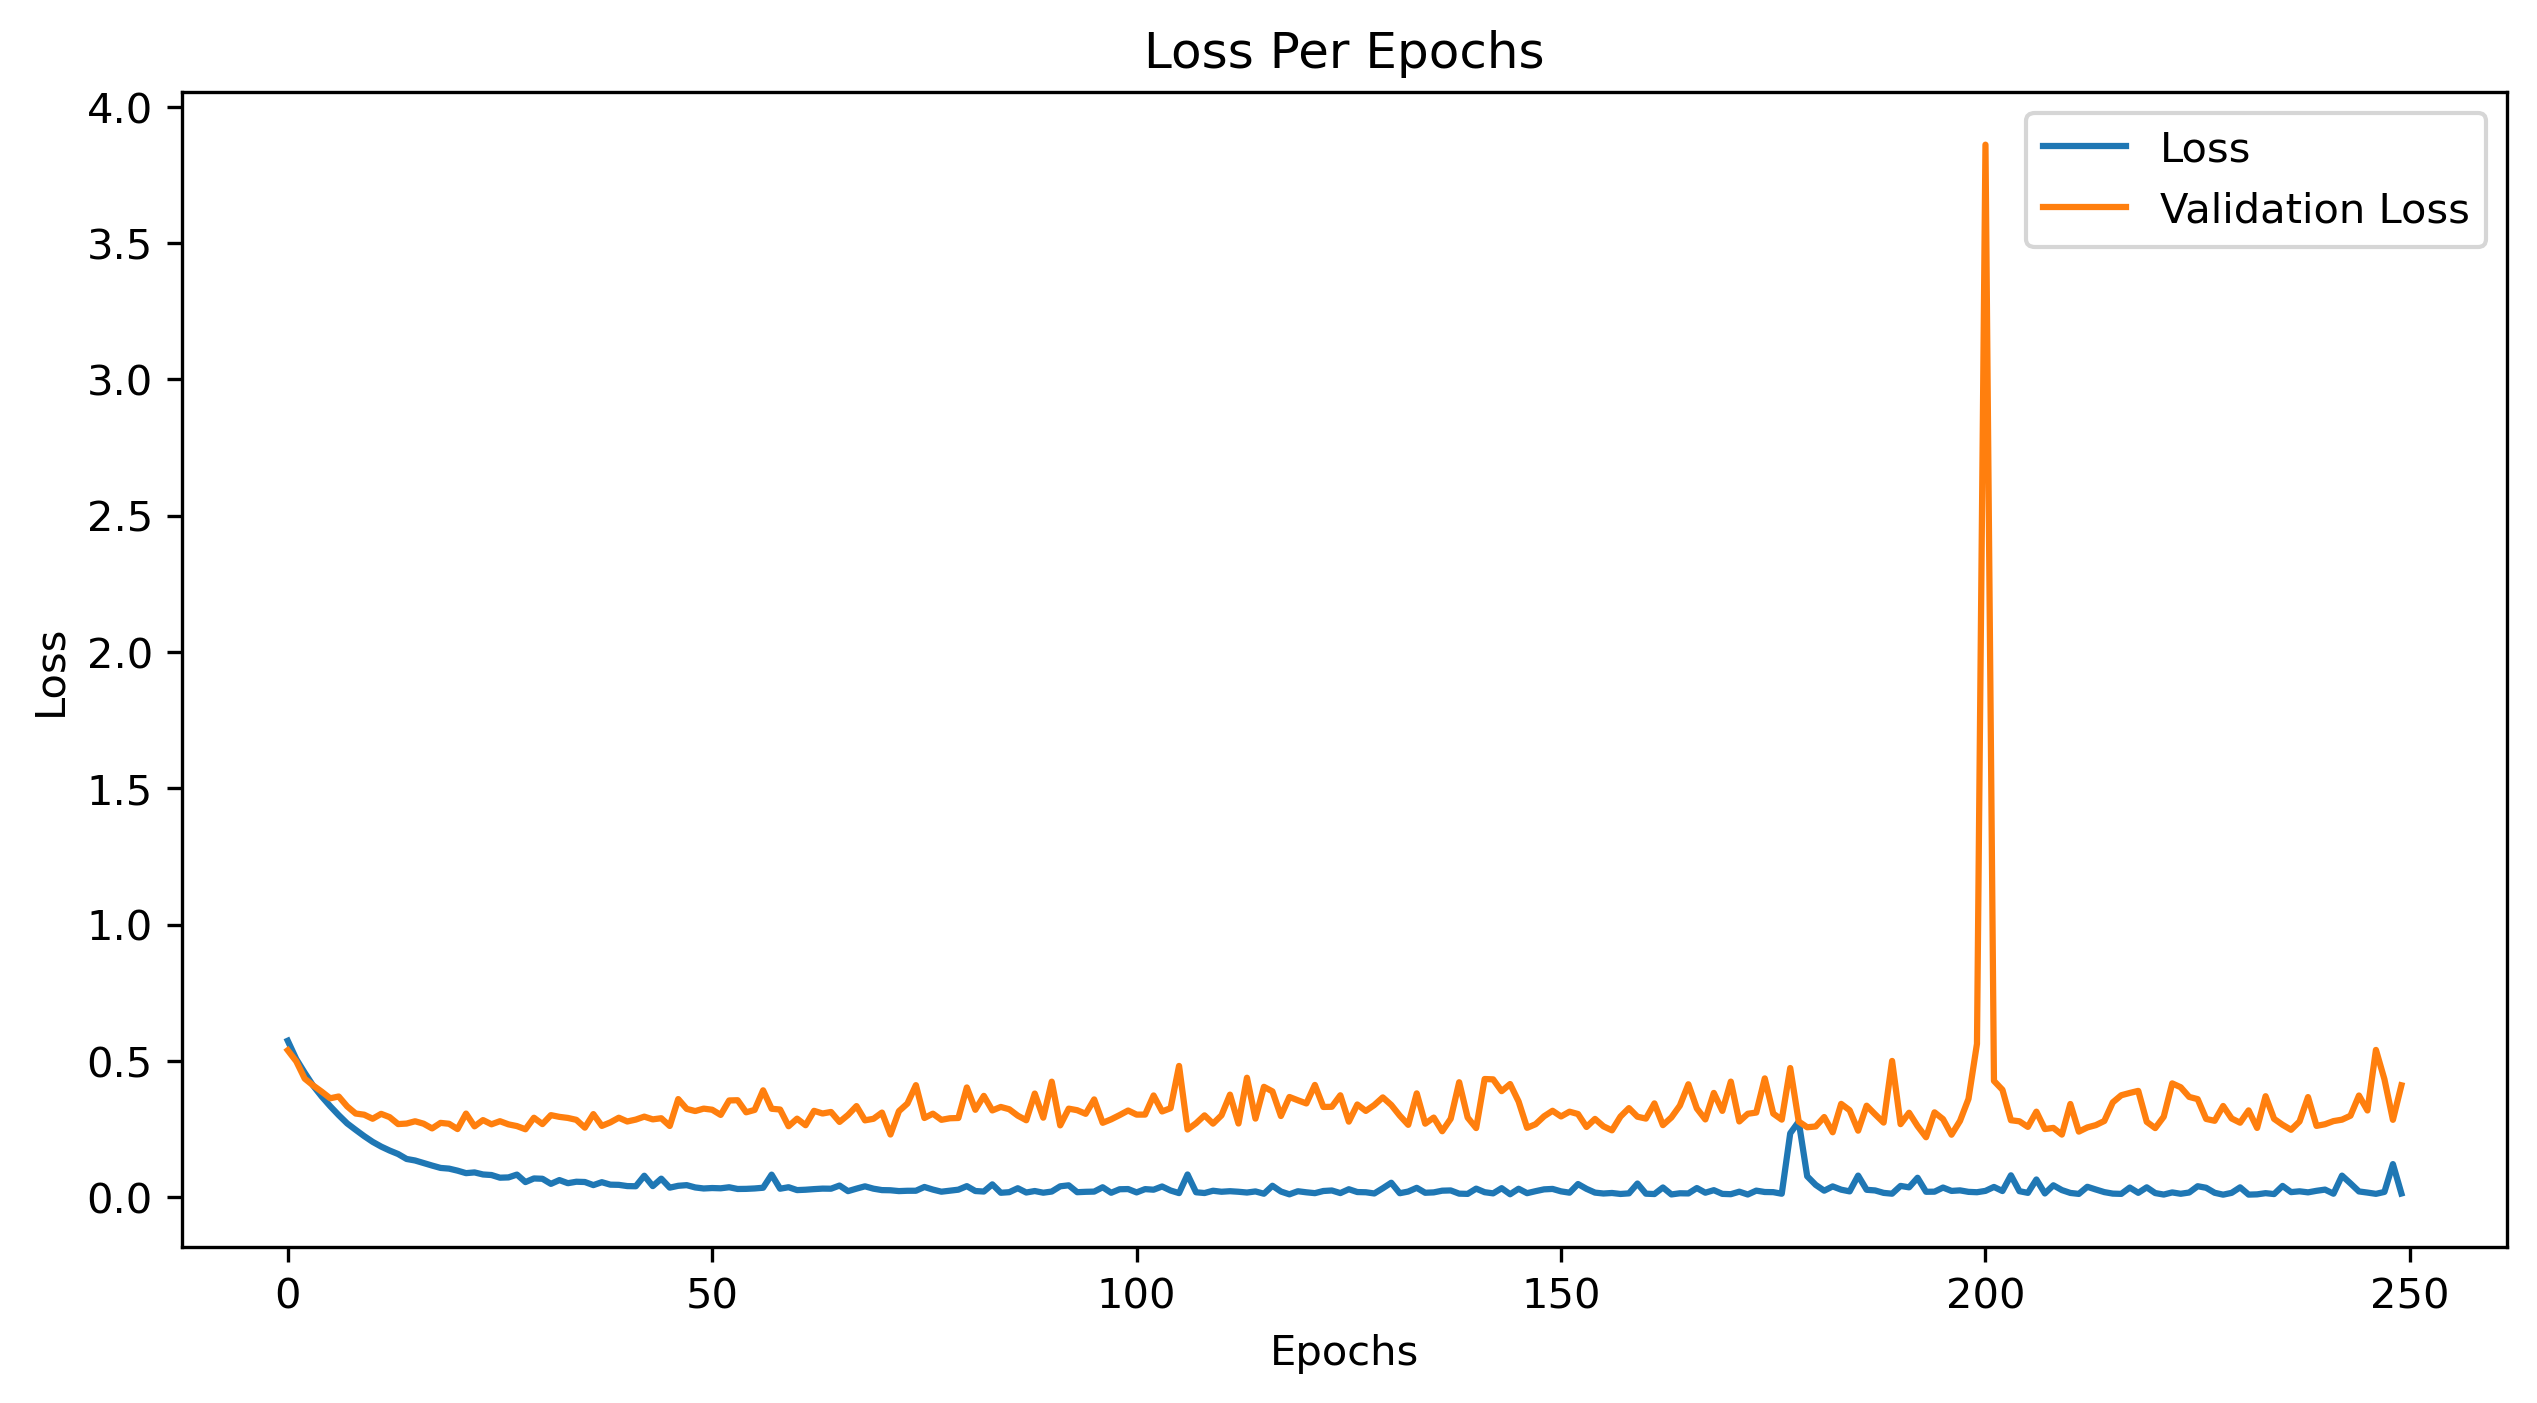

In [36]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m1[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

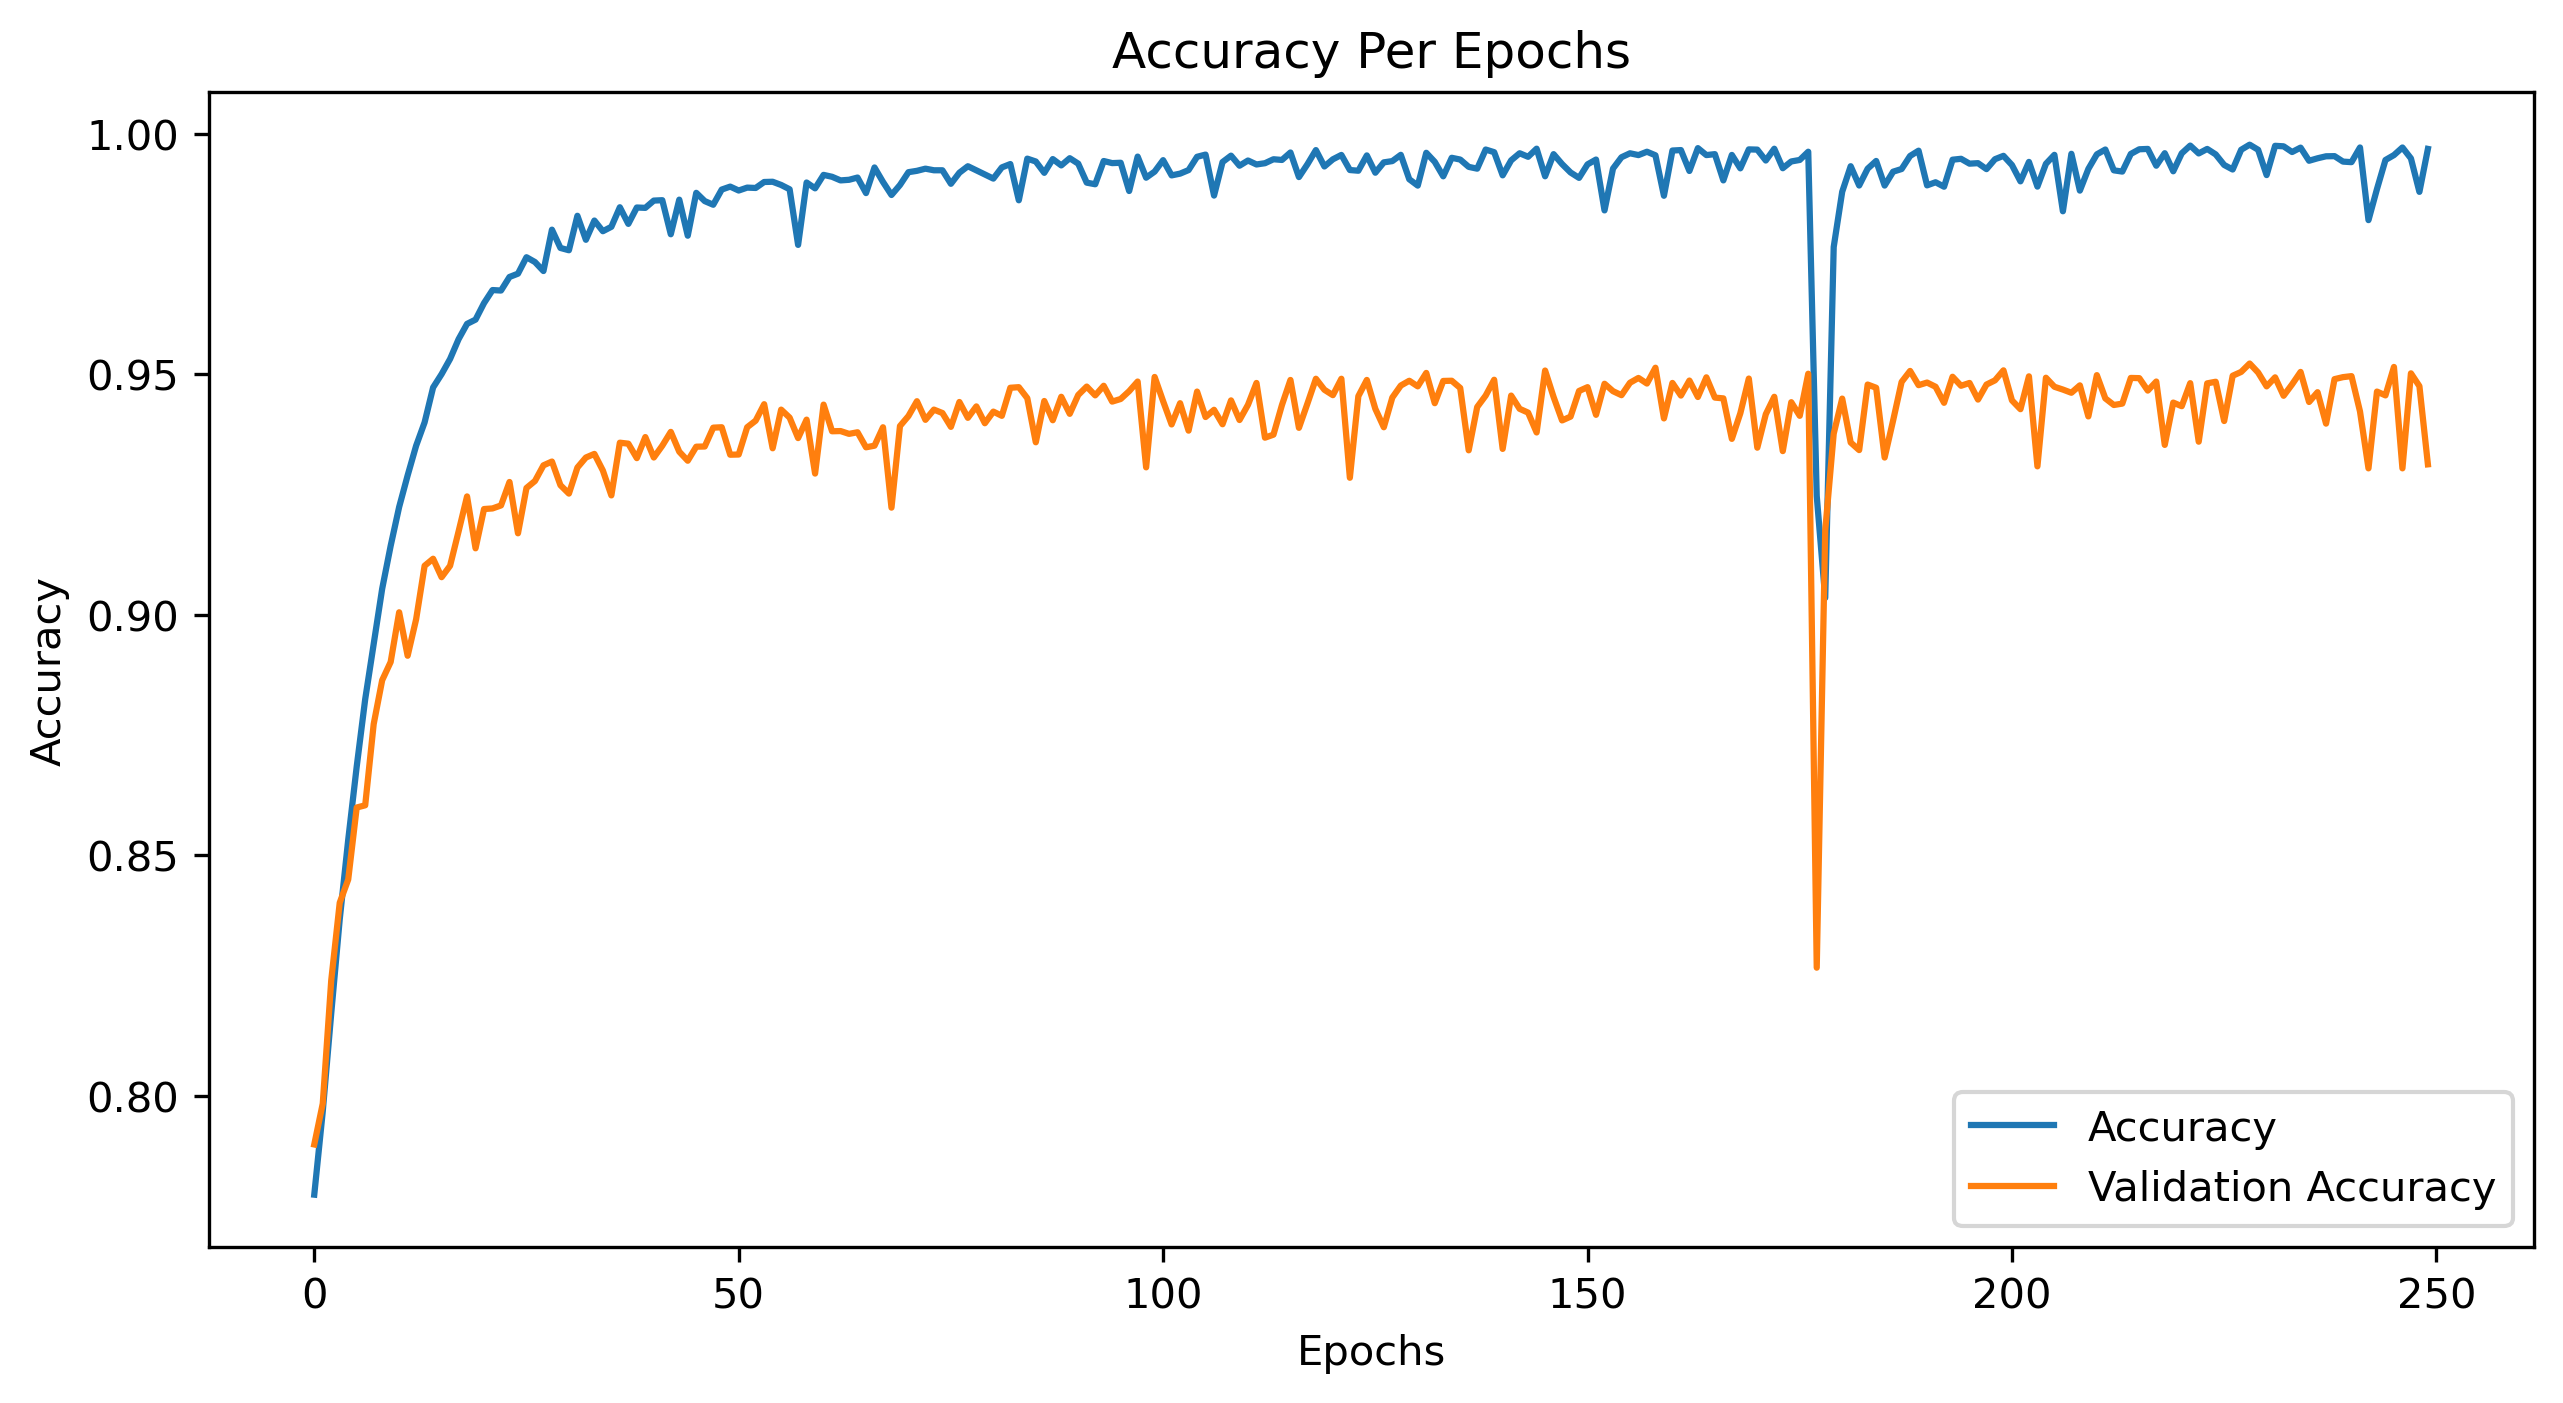

In [37]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m1[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [38]:
log_cols = ["model", "accuracy", "train_time", "pred_time"]
log = pd.DataFrame(columns=log_cols)

In [39]:
# function to predict the feature
def ANN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(ANN_Model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("ANN has predicted the class as  --> ", predicted_class[0])

In [43]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_18944727.mp3"
# get the output
ANN_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 [==============================] - 0s 24ms/step
ANN has predicted the class as  -->  2


In [44]:
# Evaluate the performance of the speaker recognition model
speaker_loss, speaker_accuracy = ANN_Model.evaluate(X_test, y_test)
print(f"Speaker Recognition Accuracy: {speaker_accuracy * 100:.2f}%")

751/751 [==============================] - 2s 3ms/step - loss: 0.4105 - accuracy: 0.9313
Speaker Recognition Accuracy: 93.13%


In [45]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = ANN_Model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)

751/751 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     18727
           1       0.92      0.72      0.81      1818
           2       0.90      0.78      0.84      3456

    accuracy                           0.93     24001
   macro avg       0.92      0.83      0.87     24001
weighted avg       0.93      0.93      0.93     24001



## Model 2 - CNN### 
Preprocessing

In [46]:
cnn_model = Sequential()
cnn_model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Conv1D(128, 3, activation='relu'))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1000, activation='relu'))
cnn_model.add(Dense(750, activation='relu'))
cnn_model.add(Dense(500, activation='relu'))
cnn_model.add(Dense(250, activation='relu'))
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dense(50, activation='relu'))
num_classes = 3  # Replace 3 with the actual number of classes in your data
cnn_model.add(Dense(num_classes, activation='softmax'))
cnn_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 63, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 61, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 30, 128)           0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 3840)              0         
                                                                 
 dense_7 (Dense)             (None, 1000)            

In [49]:
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
3001/3001 [==============================] - 69s 22ms/step - loss: 0.3471 - accuracy: 0.7851 - val_loss: 0.3117 - val_accuracy: 0.8055
Epoch 2/250
3001/3001 [==============================] - 68s 23ms/step - loss: 0.2797 - accuracy: 0.8261 - val_loss: 0.2524 - val_accuracy: 0.8465
Epoch 3/250
3001/3001 [==============================] - 71s 24ms/step - loss: 0.2079 - accuracy: 0.8768 - val_loss: 0.2100 - val_accuracy: 0.8770
Epoch 4/250
3001/3001 [==============================] - 73s 24ms/step - loss: 0.1482 - accuracy: 0.9154 - val_loss: 0.1866 - val_accuracy: 0.8915
Epoch 5/250
3001/3001 [==============================] - 71s 24ms/step - loss: 0.1045 - accuracy: 0.9415 - val_loss: 0.1872 - val_accuracy: 0.9063
Epoch 6/250
3001/3001 [==============================] - 71s 24ms/step - loss: 0.0736 - accuracy: 0.9600 - val_loss: 0.1848 - val_accuracy: 0.8977
Epoch 7/250
3001/3001 [==============================] - 71s 24ms/step - loss: 0.0560 - accuracy: 0.9707 - val_loss: 0

In [50]:
cnn_model.save("cnn_model.h5")
print("cnn_model  Saved")

cnn_model  Saved


In [51]:
# function to predict the feature
def CNN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(cnn_model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("CNN has predicted the class as  --> ", predicted_class[0])

In [68]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_20088957.mp3"
# get the output
CNN_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 [==============================] - 0s 25ms/step
CNN has predicted the class as  -->  0


In [69]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)

751/751 [==============================] - 3s 4ms/step
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     18727
           1       0.00      0.00      0.00      1818
           2       1.00      0.00      0.00      3456

    accuracy                           0.78     24001
   macro avg       0.59      0.33      0.29     24001
weighted avg       0.75      0.78      0.68     24001



## Model 3-LSTM

In [57]:
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1000, activation='relu'))
lstm_model.add(Dense(750, activation='relu'))
lstm_model.add(Dense(500, activation='relu'))
lstm_model.add(Dense(250, activation='relu'))
lstm_model.add(Dense(100, activation='relu'))
lstm_model.add(Dense(50, activation='relu'))
num_classes = 3  # Replace 3 with the actual number of classes in your data
lstm_model.add(Dense(num_classes, activation='softmax'))

lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 1000)              65000     
                                                                 
 dense_29 (Dense)            (None, 750)               750750    
                                                                 
 dense_30 (Dense)            (None, 500)               375500    
                                                                 
 dense_31 (Dense)            (None, 250)               125250    
                                                                 
 dense_32 (Dense)            (None, 100)              

In [58]:
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
3001/3001 [==============================] - 64s 21ms/step - loss: 0.4030 - accuracy: 0.7796 - val_loss: 0.4023 - val_accuracy: 0.7805
Epoch 2/250
3001/3001 [==============================] - 64s 21ms/step - loss: 0.4031 - accuracy: 0.7796 - val_loss: 0.4021 - val_accuracy: 0.7805
Epoch 3/250
3001/3001 [==============================] - 64s 21ms/step - loss: 0.4030 - accuracy: 0.7796 - val_loss: 0.4021 - val_accuracy: 0.7805
Epoch 4/250
3001/3001 [==============================] - 67s 22ms/step - loss: 0.4030 - accuracy: 0.7796 - val_loss: 0.4023 - val_accuracy: 0.7805
Epoch 5/250
3001/3001 [==============================] - 68s 23ms/step - loss: 0.4031 - accuracy: 0.7796 - val_loss: 0.4021 - val_accuracy: 0.7805
Epoch 6/250
3001/3001 [==============================] - 66s 22ms/step - loss: 0.4031 - accuracy: 0.7796 - val_loss: 0.4022 - val_accuracy: 0.7805
Epoch 7/250
3001/3001 [==============================] - 65s 22ms/step - loss: 0.4031 - accuracy: 0.7796 - val_loss: 0

In [59]:
lstm_model.save("lstm_model.h5")
print("lstm_model  Saved")

lstm_model  Saved


In [65]:
# function to predict the feature
def LSTM_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(lstm_model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("LSTM has predicted the class as  --> ", predicted_class[0])

In [70]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_20088957.mp3"
# get the output
LSTM_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 [==============================] - 0s 11ms/step
LSTM has predicted the class as  -->  2


In [82]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = lstm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)

751/751 [==============================] - 7s 10ms/step
              precision    recall  f1-score   support

           0       0.78      0.15      0.25     18727
           1       0.00      0.00      0.00      1818
           2       0.14      0.86      0.25      3456

    accuracy                           0.24     24001
   macro avg       0.31      0.33      0.16     24001
weighted avg       0.63      0.24      0.23     24001



In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

rnn_model = Sequential()
rnn_model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1000, activation='relu'))
rnn_model.add(Dense(750, activation='relu'))
rnn_model.add(Dense(500, activation='relu'))
rnn_model.add(Dense(250, activation='relu'))
rnn_model.add(Dense(100, activation='relu'))
rnn_model.add(Dense(50, activation='relu'))
num_classes = 3  # Replace 3 with the actual number of classes in your data
rnn_model.add(Dense(num_classes, activation='softmax'))

rnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 1000)              65000     
                                                                 
 dense_43 (Dense)            (None, 750)               750750    
                                                                 
 dense_44 (Dense)            (None, 500)               375500    
                                                                 
 dense_45 (Dense)            (None, 250)               125250    
                                                                 
 dense_46 (Dense)            (None, 100)              

In [74]:
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
3001/3001 [==============================] - 91s 30ms/step - loss: 0.6741 - accuracy: 0.7792 - val_loss: 0.6706 - val_accuracy: 0.7803
Epoch 2/250
3001/3001 [==============================] - 98s 33ms/step - loss: 0.6707 - accuracy: 0.7794 - val_loss: 0.6697 - val_accuracy: 0.7803
Epoch 3/250
3001/3001 [==============================] - 99s 33ms/step - loss: 0.6702 - accuracy: 0.7794 - val_loss: 0.6682 - val_accuracy: 0.7803
Epoch 4/250
3001/3001 [==============================] - 102s 34ms/step - loss: 0.6699 - accuracy: 0.7794 - val_loss: 0.6678 - val_accuracy: 0.7803
Epoch 5/250
3001/3001 [==============================] - 93s 31ms/step - loss: 0.6696 - accuracy: 0.7794 - val_loss: 0.6675 - val_accuracy: 0.7803
Epoch 6/250
3001/3001 [==============================] - 98s 33ms/step - loss: 0.6690 - accuracy: 0.7795 - val_loss: 0.6669 - val_accuracy: 0.7806
Epoch 7/250
3001/3001 [==============================] - 102s 34ms/step - loss: 0.6688 - accuracy: 0.7796 - val_loss:

In [76]:
lstm_model.save("rnn_model.h5")
print("rnn_model  Saved")

rnn_model  Saved


In [77]:
# function to predict the feature
def RNN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(rnn_model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("RNN has predicted the class as  --> ", predicted_class[0])

In [79]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_20088957.mp3"
# get the output
RNN_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 [==============================] - 0s 409ms/step
RNN has predicted the class as  -->  0


In [81]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)

751/751 [==============================] - 7s 9ms/step
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     18727
           1       0.00      0.00      0.00      1818
           2       0.00      0.00      0.00      3456

    accuracy                           0.78     24001
   macro avg       0.26      0.33      0.29     24001
weighted avg       0.61      0.78      0.68     24001



## Confusion Matrix

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model

# Load the h5 model
rnn_model = load_model('rnn_model.h5')  # Replace 'your_model.h5' with the actual path to your model file

# Get the model predictions
y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)

# Generate confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

NameError: name 'X_test' is not defined